## Sarcina 1: Foloseste KNearestNeighbor de la sklearn pentru prezicerea ratei de dezabonare a clientilor unei companii de telecom

**Incarcam setul de date.**

In [ ]:
!mkdir data && curl -o data/telecom_churn.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson04/notebooks/data/telecom_churn.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   187  100   187    0     0    663      0 --:--:-- --:--:-- --:--:--   663
100  273k  100  273k    0     0   584k      0 --:--:-- --:--:-- --:--:--  584k


In [ ]:
import pandas as pd
dataset = pd.read_csv("data/telecom_churn.csv")
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Pentru coloana *Voice mail plan* schimba valorile din No/Yes in 0/1**

In [ ]:
dic = {"Yes": 1, "No": 0}
dataset["Voice mail plan"] = dataset["Voice mail plan"].map(dic)

In [ ]:
dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


**Extrage setul de date X din dataframe (dataset) folosind doar caracteristicile numerice (e.g. "Voice mail plan", "Number vmail messages", "Total day minutes", "Total day calls", "Total eve minutes", "Total eve calls", "Total night minutes", "Total night calls", "Total intl minutes", "Total intl calls", "Customer service calls")**

**Caracteristica target este *Churn*.**

In [ ]:
features = ["Voice mail plan", "Number vmail messages", "Total day minutes", "Total day calls", "Total eve minutes", "Total eve calls", "Total night minutes", "Total night calls", "Total intl minutes", "Total intl calls", "Customer service calls"]
X = dataset[features]
y = dataset[["Churn"]]

In [ ]:
X.head()

,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


In [ ]:
y.head()

,Churn
0,False
1,False
2,False
3,False
4,False


**Imparte setul de date in: date si label de antrenare, date si labbel de test. Foloseste functia *train_test_split* din *sklearn*.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Importa din sklearn modelul KNearestClassifier, antreneaza-l cu ajutorul metodei *fit()* si prezice valorile pentru X_test cu ajutorul metodei *predict()*.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import mode

start = time.time()
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, Y_train)

y_hat = knn_model.predict(X_test)
end = time.time()
print("Acuratetea este de :", accuracy_score(Y_test, y_hat))
print("Timpul de invatare a fost de: ", end-start)

Acuratetea este de : 0.8905547226386806
Timpul de invatare a fost de:  0.03883838653564453


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Care este acuratetea modelului obtinut? Poti folosi functia *accuracy_score()* de la *sklearn*.** 

In [ ]:
print("Acuratetea este de :", accuracy_score(Y_test, y_hat))

Acuratetea este de : 0.8905547226386806


## Sarcina 2: Foloseste propria ta implementare KNearestNeighbor pentru prezicerea ratei de dezabonare a clientilor unei companii de telecom. Compara timpul luat de modelul tau cu timpul luat de libraria sklearn

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

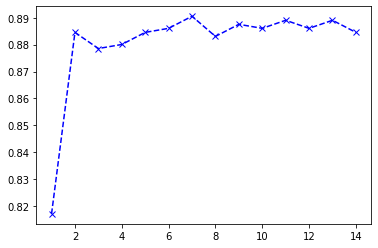

In [ ]:
#Searching for the best k value
accuracy_vals = []
for i in range(1, 15):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    Y_hat = knn_model.predict(X_test)

    accuracy_vals.append(accuracy_score(Y_test, Y_hat))
    
plt.plot(range(1, 15), accuracy_vals, color='blue', marker='x', linestyle='dashed')

#Implementation of KNN algorithm 

def KNN_Algorithm(X_train, X_test, Y_train, k):
  pass



In [ ]:
#Extra HW:
#Trying to write KNN algoritm - not completed
def knn2(X_train, X_test, Y_train, k):
    y_pred = []
    X_train, Y_train = (X_train.to_numpy(), Y_train.to_numpy())
    X_test = X_test.to_numpy()

    for test_pt in X_test:
        distances = []

        for i in range(len(X_train)):
            distances.append(euclidean_distance(X_train[i], test_pt, Y_train[i]))
            sorted_list = sorted(distances, key=lambda x: x[0])[:k]
            voting = mode([x[1] for x in sorted_list]).mode[0]
            y_pred.append(voting)
          
    return len(y_pred)
        

In [ ]:
def euclidean_distance(point_a, point_b, point_c):
    distance = np.linalg.norm(point_a - point_b)
    return distance, point_c

In [ ]:
start = time.time()
knn2(X_train, X_test, Y_train, 3)
end = time.time()

print("Execution time:", end-start)

KeyboardInterrupt: ignored

In [ ]:
X_train.shape, X_test.shape

((2666, 11), (667, 11))